In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
# Set plot style
sns.set(style="white", palette="tab10")
plt.rcParams["figure.figsize"] = [12, 8]

In [3]:
def loadData(filepath: str) -> pd.DataFrame:
    """
    Load the dataset and display basic information

    :param filepath: Path to the dataset
    :return df: DataFrame containing the dataset
    """
    print("\nDataset Basic Information:")
    print("-" * 30)

    df = pd.read_csv(filepath)
    print(f"Dataset shape: {df.shape}")

    # Basic info about the dataset
    print("\nDataset Info:")
    print(df.info())

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

    # Basic information
    print(f"Number of records: {len(df):,}")
    print(f"Number of unique users: {df['user_id'].nunique():,}")
    print(f"Number of unique items: {df['item_id'].nunique():,}")

    return df

In [4]:
train_df = loadData("../data/raw/train_interactions.csv")
# check how many users have <= 5 interactions
user_interactions = train_df["user_id"].value_counts()
print(f"\nNumber of users with <= 5 interactions: {sum(user_interactions <= 5)}")


Dataset Basic Information:
------------------------------
Dataset shape: (2293985, 4)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293985 entries, 0 to 2293984
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user_id    int64 
 1   item_id    int64 
 2   item_name  object
 3   playtime   int64 
dtypes: int64(3), object(1)
memory usage: 70.0+ MB
None

Missing values:
user_id      0
item_id      0
item_name    0
playtime     0
dtype: int64
Number of records: 2,293,985
Number of unique users: 54,315
Number of unique items: 8,368

Number of users with <= 5 interactions: 8928


**Observations:**

- The dataset contains 2,293,985 interaction records.
- There are 54,315 unique users and 8,368 unique items.
- There are no missing values in the dataset.
- A significant number of users (8,928) have 5 or fewer interactions.

In [5]:
def analyzePlaytimeDistribution(df: pd.DataFrame):
    """
    Analyze the playtime distribution and identify outliers

    :param df: DataFrame containing the dataset
    """
    print("\nPlaytime Statistics:")
    print("-" * 30)

    # Basic statistics
    playtime_stats = df["playtime"].describe()
    print(playtime_stats)

    # Calculate additional metrics
    skewness = stats.skew(df["playtime"])
    kurtosis = stats.kurtosis(df["playtime"])

    print(f"\nSkewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")

    # Visualize distribution
    plt.figure(figsize=(15, 5))

    # Plot 1: Distribution
    plt.subplot(121)
    plt.hist(df["playtime"], bins=50)
    plt.title("Playtime Distribution")
    plt.xlabel("Playtime")
    plt.ylabel("Count")

    # Plot 2: Box plot
    plt.subplot(122)
    plt.boxplot(df["playtime"])
    plt.title("Playtime Box Plot")
    plt.ylabel("Playtime")

    plt.tight_layout()
    plt.show()

    # Visualize distribution
    plt.figure(figsize=(15, 5))

    # Plot 1: Distribution with log scale
    plt.subplot(121)
    plt.hist(df["playtime"], bins=50)
    plt.yscale("log")
    plt.title("Playtime Distribution (Log Scale)")
    plt.xlabel("Playtime")
    plt.ylabel("Count (log)")

    # Plot 2: Box plot
    plt.subplot(122)
    plt.boxplot(df["playtime"])
    plt.title("Playtime Box Plot")
    plt.ylabel("Playtime")

    plt.tight_layout()
    plt.show()

    # Calculate quantiles for outlier analysis
    quantiles = df["playtime"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
    print("\nPlaytime Quantiles:")
    print("-" * 30)
    for q, value in quantiles.items():
        print(f"{q * 100}th percentile: {value:.2f}")


Playtime Statistics:
------------------------------
count    2.293985e+06
mean     1.578779e+03
std      6.894908e+03
min      1.000000e+00
25%      4.600000e+01
50%      2.100000e+02
75%      8.130000e+02
max      6.352950e+05
Name: playtime, dtype: float64

Skewness: 16.31
Kurtosis: 522.29


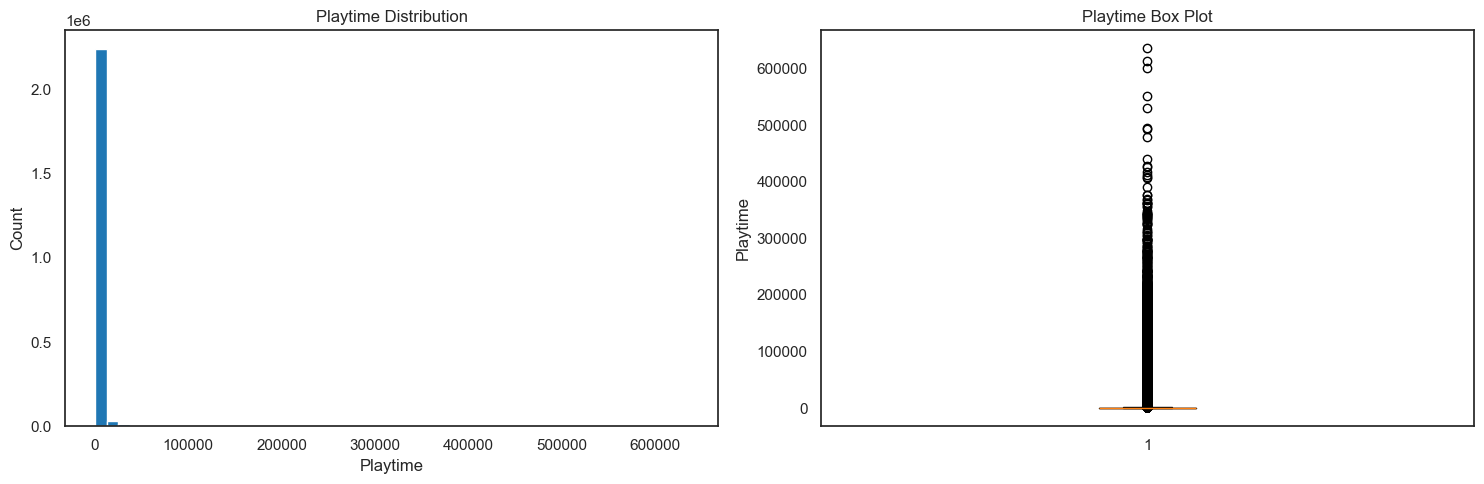

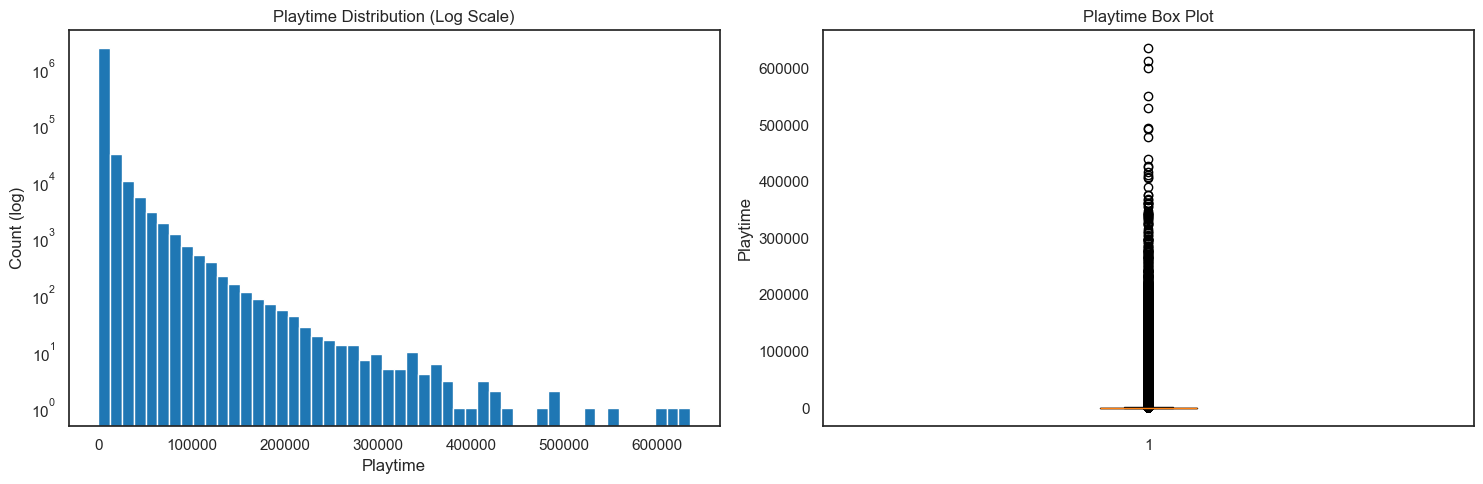


Playtime Quantiles:
------------------------------
25.0th percentile: 46.00
50.0th percentile: 210.00
75.0th percentile: 813.00
90.0th percentile: 2765.00
95.0th percentile: 6023.00
99.0th percentile: 26437.32


In [6]:
analyzePlaytimeDistribution(train_df)

**Observations:**

- The playtime data is highly skewed, with a mean of 1578.78 and a significant standard deviation of 6894.91. The median playtime is only 210.
- The skewness of 16.31 and kurtosis of 522.29 confirm this strong positive skew and the presence of outliers.
- The quantiles show a large spread, particularly at higher percentiles (99th percentile is 26437.32).
- The log-scaled histogram reveals more detail in the lower playtime ranges.


In [7]:
def analyzeUserEngagement(df: pd.DataFrame) -> pd.Series:
    """
    Analyze user engagement by calculating the number of games played per user

    :param df: DataFrame containing the dataset

    :return games_per_user: Series containing the number of games played per user
    """
    print("\nUser Engagement Analysis:")
    print("-" * 30)

    # Games per user
    games_per_user = df.groupby("user_id").size()

    print("\nGames per User Statistics:")
    print(games_per_user.describe())

    # Visualize distribution
    plt.figure(figsize=(15, 5))

    # Plot 1: Games per user distribution
    plt.subplot(121)
    plt.hist(games_per_user, bins=50)
    plt.title("Distribution of Games per User")
    plt.xlabel("Number of Games")
    plt.ylabel("Number of Users")

    # Plot 2: Games per user boxplot
    plt.subplot(122)
    plt.boxplot(games_per_user)
    plt.title("Games per User Box Plot")
    plt.ylabel("Number of Games")

    plt.tight_layout()
    plt.show()

    return games_per_user


User Engagement Analysis:
------------------------------

Games per User Statistics:
count    54315.000000
mean        42.234834
std         61.378751
min          1.000000
25%         10.000000
50%         26.000000
75%         55.000000
max       2897.000000
dtype: float64


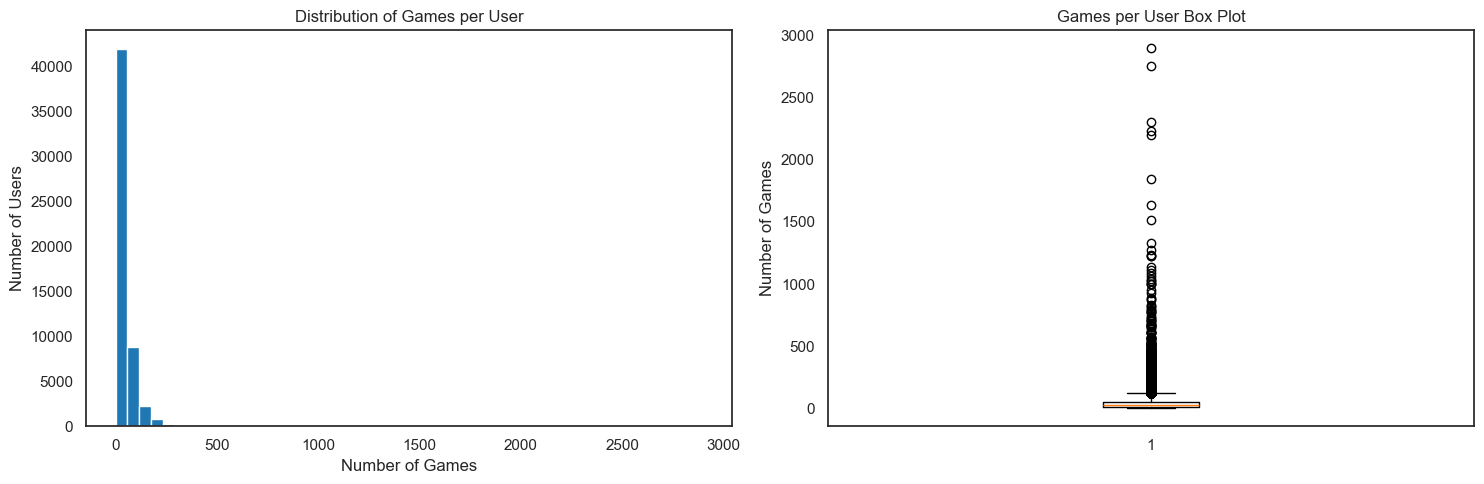

In [8]:
games_per_user = analyzeUserEngagement(train_df)

**Observations:**

- On average, users have played approximately 42.23 games.
- The distribution is also skewed right, with a large standard deviation of 61.38, indicating variability in user engagement.
- The median is 26, suggesting that many users have played significantly fewer games than the mean.
- The maximum number of games played by a user is 2897, highlighting some extremely active users.


In [9]:
def analyzeItemPopularity(df: pd.DataFrame) -> pd.Series:
    """
    Analyze item popularity by calculating the number of times each item is played

    :param df: DataFrame containing the dataset

    :return item_popularity: Series containing the number of times each item is played
    """
    print("\nItem Popularity Analysis:")
    print("-" * 30)

    # Games per item
    item_popularity = df.groupby("item_id").size()

    print("\nItem Popularity Statistics:")
    print(item_popularity.describe())

    # Visualize distribution
    plt.figure(figsize=(15, 5))

    # Plot 1: Item popularity distribution
    plt.subplot(121)
    plt.hist(item_popularity, bins=50)
    plt.title("Distribution of Item Popularity")
    plt.xlabel("Number of Plays")
    plt.ylabel("Number of Items")

    # Plot 2: Item popularity boxplot
    plt.subplot(122)
    plt.boxplot(item_popularity)
    plt.title("Item Popularity Box Plot")
    plt.ylabel("Number of Plays")

    plt.tight_layout()
    plt.show()

    # Plot 1: Item popularity distribution
    plt.subplot(121)
    plt.hist(item_popularity, bins=50)
    plt.title("Distribution of Item Popularity (Log Scale)")
    plt.yscale("log")
    plt.xlabel("Number of Plays")
    plt.ylabel("Number of Items (log)")

    # Plot 2: Item popularity boxplot
    plt.subplot(122)
    plt.boxplot(item_popularity)
    plt.title("Item Popularity Box Plot")
    plt.ylabel("Number of Plays")

    plt.tight_layout()
    plt.show()

    return item_popularity


Item Popularity Analysis:
------------------------------

Item Popularity Statistics:
count     8368.000000
mean       274.137787
std       1225.395199
min          1.000000
25%          5.000000
50%         20.000000
75%         96.250000
max      34626.000000
dtype: float64


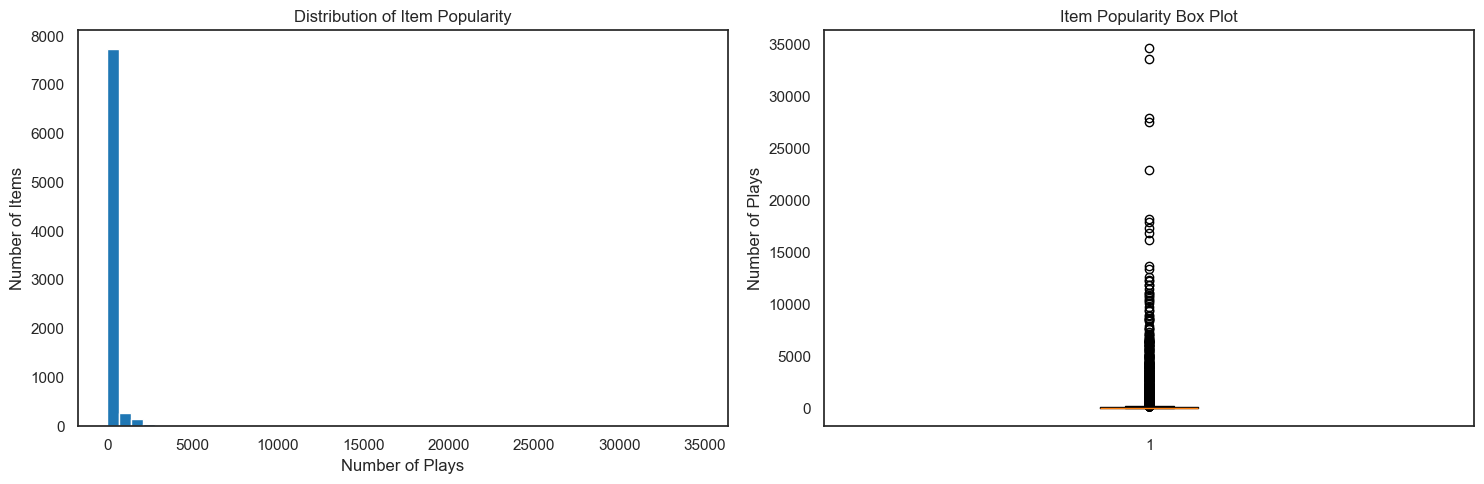

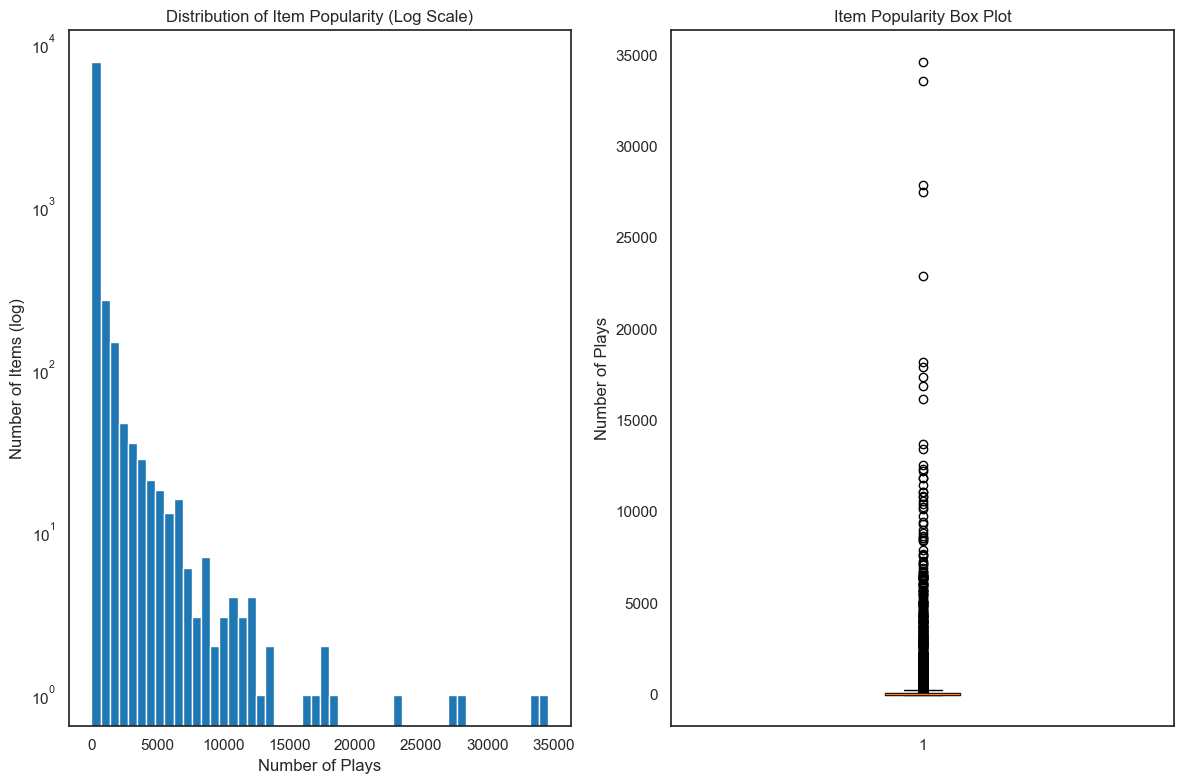

In [10]:
item_popularity = analyzeItemPopularity(train_df)

**Observations:**
- The distribution of item popularity is also right skewed, with a mean of 274.
- Again, log-scaling the histogram reveals more detail in the lower popularity ranges.